In [4]:
## S&P 500 STOCK CLUSTERING AND NEURAL NETWORK ANALYSIS ##
# This script downloads the most recent listing of stock tickers of the S&P 500 from Wikipedia
# It then downloads the basic stock prices dating back to January 1st, 2015
# These data points are aggreagated into basic average summaries as well as processed for neural network analysis.
# At its most fundimental level, the algorithm uses the previous n days of adjusted close data to predict a rise
# or fall in price the following day/week/month.

# It is important to note that the S&P 500 does not mimic the behavior of all stocks. Separately, the metrics by which
# we evaluate our model are constantly improving. At this point, there is a theoretical lower-bound of 50% accuracy:
# did the stock go up or down. However we also seek to gauge how much the stock increased or decreased by increasing
# the number of neurons in the output layer or by running an entirely separate anlaysis--such a discussion is ongoing.

In [34]:
import datetime
import urllib.request
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas.io.data import DataReader
import re

In [6]:
# COLLECT STOCK TICKERS
wiki_page = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
wiki_page = str(wiki_page.read())

In [7]:
ticker_locations_part_one = [m.start() for m in re.finditer('XNYS', wiki_page)]
ticker_locations_part_two = [m.start() for m in re.finditer('.com/symbol/', wiki_page)]
all_tickers = []
for t in range(0,len(ticker_locations_part_one)): # t=1
    ticker = wiki_page[ticker_locations_part_one[t]:ticker_locations_part_one[t]+15]
    ticker = re.search('XNYS:(.+?)>',ticker).group(1).replace('"','')
    all_tickers.append(ticker)
for t in range(0,len(ticker_locations_part_two)):
    ticker = wiki_page[ticker_locations_part_two[t]:ticker_locations_part_two[t]+25]
    ticker = re.search('com/symbol/(.+?)>',ticker).group(1).replace('"','')
    all_tickers.append(ticker)

In [8]:
symbols_list = all_tickers

symbols=[]
for ticker in symbols_list:
    try:
        r = DataReader(ticker, "yahoo", start=datetime.datetime(2014, 12, 30))
        # add a symbol column
        r['Symbol'] = ticker 
        symbols.append(r)
    except:
        print(ticker, "has been renamed")
# concatenate all the dfs
df = pd.concat(symbols)
#define cell with the columns that i need
cell= df[['Symbol','Open','High','Low','Adj Close','Volume']]
#changing sort of Symbol (ascending) and Date(descending) setting Symbol as first column and changing date format
cell = cell.reset_index().sort(['Symbol', 'Date'], ascending=[1,0]).set_index(['Symbol'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [9]:
last_close = []
five_day_avg = []
one_month_avg = []
two_month_avg = []
three_month_avg = []
six_month_avg = []
twelve_month_avg = []

last_close_vol = []
five_day_avg_vol = []
one_month_avg_vol = []
two_month_avg_vol = []
three_month_avg_vol = []
six_month_avg_vol = []
twelve_month_avg_vol = []

for i in range(0,len(symbols_list)):
    ticker = symbols_list[i]
    subset = cell.loc[ticker]

    last_close.append(subset.iloc[2,:]["Adj Close"])
    five_day_avg.append(subset.iloc[2:7,:]["Adj Close"].mean())
    one_month_avg.append(subset.iloc[2:32,:]["Adj Close"].mean())
    two_month_avg.append(subset.iloc[2:62,:]["Adj Close"].mean())
    three_month_avg.append(subset.iloc[2:92,:]["Adj Close"].mean())
    six_month_avg.append(subset.iloc[2:182,:]["Adj Close"].mean())
    twelve_month_avg.append(subset.iloc[2:365,:]["Adj Close"].mean())

    last_close_vol.append(subset.iloc[2,:]["Volume"])
    five_day_avg_vol.append(subset.iloc[2:7,:]["Volume"].mean())
    one_month_avg_vol.append(subset.iloc[2:32,:]["Volume"].mean())
    two_month_avg_vol.append(subset.iloc[2:62,:]["Volume"].mean())
    three_month_avg_vol.append(subset.iloc[2:92,:]["Volume"].mean())
    six_month_avg_vol.append(subset.iloc[2:182,:]["Volume"].mean())
    twelve_month_avg_vol.append(subset.iloc[2:365,:]["Volume"].mean())

ticker_data = {'Ticker':ticker,'Last Close':last_close,'Five Day Avg':five_day_avg,'One Month Avg':one_month_avg,
               'Two Month Avg':two_month_avg,'Three Month Avg':three_month_avg,'Six Month Avg':six_month_avg,
               'Twelve Month Avg':twelve_month_avg,'Last Close Vol':last_close_vol,'Five Day Avg Vol':five_day_avg_vol,
               'One Month Avg Vol':one_month_avg_vol,'Two Month Avg Vol':two_month_avg_vol,
               'Three Month Avg Vol':three_month_avg_vol,'Six Month Avg Vol':six_month_avg_vol,
               'Twelve Month Avg Vol':one_month_avg_vol}
ticker_outputs = DataFrame(data=ticker_data, index=symbols_list)
ticker_outputs = ticker_outputs[['Last Close','Five Day Avg','One Month Avg','Two Month Avg','Three Month Avg',
                                'Six Month Avg','Twelve Month Avg','Last Close Vol','Five Day Avg Vol',
                                'One Month Avg Vol','Two Month Avg Vol','Three Month Avg Vol','Six Month Avg Vol',
                                'Twelve Month Avg Vol']]

In [10]:
ticker_outputs

,Last Close,Five Day Avg,One Month Avg,Two Month Avg,Three Month Avg,Six Month Avg,Twelve Month Avg,Last Close Vol,Five Day Avg Vol,One Month Avg Vol,Two Month Avg Vol,Three Month Avg Vol,Six Month Avg Vol,Twelve Month Avg Vol
MMM,165.729996,165.362000,171.063333,174.901790,175.544803,169.985857,158.267461,2233400,2079760.0,2.018490e+06,1.752740e+06,1.786234e+06,1.881844e+06,2.018490e+06
ABT,38.700001,39.364001,41.060924,41.824430,41.961040,40.626115,42.186153,6323200,8349240.0,8.224510e+06,8.890738e+06,9.303991e+06,9.232422e+06,8.224510e+06
ABBV,56.790001,57.616000,61.397330,62.877961,63.101385,60.597101,59.576313,9746200,13041840.0,6.447157e+06,6.631000e+06,6.911699e+06,7.487535e+06,6.447157e+06
ACN,118.610001,116.423999,116.193804,114.085818,113.583626,112.403137,105.496947,5361100,2642220.0,2.837610e+06,2.409567e+06,2.363926e+06,2.371272e+06,2.837610e+06
AYI,217.369995,222.096002,244.113309,257.199987,258.425378,248.224102,224.425527,394500,595480.0,5.354933e+05,3.881733e+05,3.599689e+05,4.480628e+05,5.354933e+05
AAP,138.139999,139.485998,145.261000,151.110713,155.738736,155.024495,160.879510,731700,1037760.0,9.342800e+05,1.057015e+06,9.964967e+05,9.700367e+05,9.342800e+05
AES,11.460000,11.648000,12.016028,12.133969,12.148302,11.487718,11.000542,9286400,6188820.0,5.709057e+06,5.233940e+06,4.963496e+06,5.003086e+06,5.709057e+06
AET,105.699997,107.417999,112.012592,114.527644,115.518445,114.078169,112.308613,2248200,3203280.0,2.307033e+06,1.929253e+06,2.527966e+06,2.435453e+06,2.307033e+06
AFL,68.389999,68.874000,70.843333,71.812633,71.921159,68.668762,63.968071,1147300,2015800.0,1.582880e+06,1.630015e+06,1.703596e+06,1.958924e+06,1.582880e+06
AMG,131.570007,135.066000,143.071666,143.186500,142.975556,151.386500,165.746088,537400,743160.0,5.065533e+05,4.603983e+05,5.045022e+05,5.405967e+05,5.065533e+05


In [11]:
ticker_outputs.loc['aapl']

Last Close              1.110200e+02
Five Day Avg            1.123870e+02
One Month Avg           1.142604e+02
Two Month Avg           1.112684e+02
Three Month Avg         1.072062e+02
Six Month Avg           1.031501e+02
Twelve Month Avg        1.071937e+02
Last Close Vol          2.833170e+07
Five Day Avg Vol        3.420012e+07
One Month Avg Vol       3.330037e+07
Two Month Avg Vol       3.554524e+07
Three Month Avg Vol     3.506453e+07
Six Month Avg Vol       3.650255e+07
Twelve Month Avg Vol    3.330037e+07
Name: aapl, dtype: float64

In [12]:
cell.loc['A']

,Date,Open,High,Low,Adj Close,Volume
Symbol,,,,,,
A,2016-11-04,43.689999,44.919998,43.689999,44.320000,2216300
A,2016-11-03,43.330002,44.000000,43.180000,43.660000,2300400
A,2016-11-02,43.470001,43.730000,43.240002,43.259998,2240300
A,2016-11-01,43.730000,44.110001,43.139999,43.490002,2133100
A,2016-10-31,43.330002,43.700001,43.180000,43.570000,1556800
A,2016-10-28,43.380001,43.869999,43.110001,43.220001,1470500
A,2016-10-27,43.970001,44.189999,43.349998,43.380001,2392800
A,2016-10-26,43.419998,43.820000,43.240002,43.369999,2146200
A,2016-10-25,45.259998,45.590000,43.169998,43.509998,3949500


In [86]:
"""Need to create a structure that makes training data in the form: [day1, day2, day3, day4, day5, result] for each 
ticker/stock. Then I can sample 400 of the 505 as training data, 55 for testing and the last 50 for validation. Each
ticker will have about 36 months worth of data (365*3-5 = 1090 training/testing/validation values)."""
training_data = np.random.choice(symbols_list, 400, replace=False) # 400 samples
testing_data = np.random.choice(list(set(symbols_list)-set(training_data)),55,replace=False) # 55 samples
validation_data = list(set(symbols_list)-set(training_data)-set(testing_data)) # 50 samles

for ticker in training_data:
    stock_backlog = cell.loc[ticker]
    for i in range(1,len(stock_backlog)):
        #print(i)
    
# print(stock_backlog)
# range(len(stock_backlog),1)

SyntaxError: unexpected EOF while parsing (<ipython-input-86-276e9c0a0e5a>, line 14)

In [93]:
stock_backlog.iloc[-1,:]

Date         2014-12-30 00:00:00
Open                      107.89
High                      108.29
Low                       107.48
Adj Close                102.689
Volume                    399200
Name: GPC, dtype: object

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
X = np.array([[1,2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [13]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1], dtype=int32)

In [14]:
kmeans.predict([[0,0],[4,4]])

array([0, 1], dtype=int32)

In [15]:
kmeans.cluster_centers_

array([[ 1.,  2.],
       [ 4.,  2.]])

In [16]:
plt.plot(np.log(ticker_outputs["Five Day Avg Vol"]), np.log(ticker_outputs["Last Close"]), 'ro')

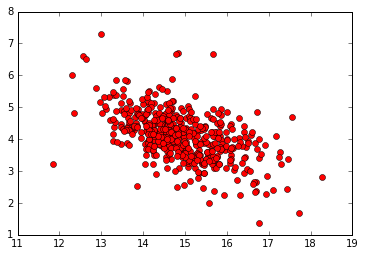

In [17]:
plt.show()

In [18]:
for a in range(0,len(ticker_outputs)):
    i = ticker_outputs["Five Day Avg Vol"]
    j = ticker_outputs["Last Close"]
    addition = np.array()

TypeError: Required argument 'object' (pos 1) not found

In [19]:
X = np.array([np.log(ticker_outputs["Five Day Avg Vol"]), np.log(ticker_outputs["Last Close"])])
X

array([[ 14.54212153,  15.95838923,  16.3008138 , ...,  14.81556874,
         15.7618092 ,  14.81766334],
       [  5.10138966,   3.66484285,   4.03335531, ...,   3.92986296,
          3.72158868,   3.47320798]])

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [22]:
kmeans.labels_

array([0, 1], dtype=int32)

In [23]:
kmeans.cluster_centers_

array([[ 14.54212153,  15.95838923,  16.3008138 , ...,  14.81556874,
         15.7618092 ,  14.81766334],
       [  5.10138966,   3.66484285,   4.03335531, ...,   3.92986296,
          3.72158868,   3.47320798]])

In [21]:
kmeans

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)